# Deeplab

In [1]:
%matplotlib inline
# %load_ext autoreload
# %autoreload 2
from learn import *

In [2]:
sz = 256
num_slice = 9

num_gpus = 2
gpu_start = 4
num_workers = 8
device_ids = range(gpu_start, gpu_start + num_gpus)
torch.cuda.set_device(gpu_start)
bs = 10 * num_gpus

In [3]:
model_name = 'deeplab'

In [4]:
data = None

In [5]:
learn, denorm, data = learner_on_dataset(datapaths[0], bs, device_ids, num_workers, model_name='deeplab',
                                         debug=False, global_dataset=True, data=data, num_slice=num_slice, sz=sz)
(trn_x,trn_y), (val_x,val_y) = data


Data finished loading: data/train/AOI_3_Paris_Train


In [6]:
# learn.load('deeplab-shanghai-wds')
learn.unfreeze()

epoch      trn_loss   val_loss   mask_acc                    
    0      0.69963    0.693148   0.93133   



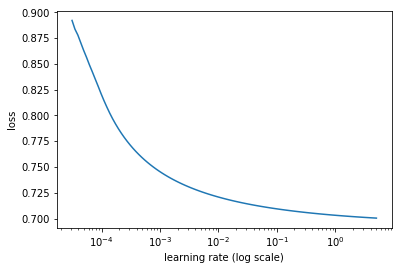

In [7]:
learn.lr_find()
learn.sched.plot()

In [7]:
learn.load('deeplab-paris')

In [ ]:
%%time
lr = 1e-4 / 5
lrs = np.array([lr/9, lr])
wd = 0.025
wds = [wd/9, wd]
learn.unfreeze()
train_and_plot(learn, 0, 'deeplab-paris', lrs=lrs, n_cycles=5, wds=wds, use_wd_sched=True,
               cycle_len=2, cycle_mult=2, best_save_name='deeplab-paris')

epoch      trn_loss   val_loss   mask_acc                    
    0      0.251038   0.207428   0.918573  
